SAMEER KHATWANI  
PRN: 22070126099

In [1]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv(r'C:\Users\samee\OneDrive\Documents\SEM5\NLP\ASS2\IMDB Dataset.csv')

# Preprocessing steps
df.drop_duplicates(inplace=True)  # Remove duplicates
df.dropna(subset=['review'], inplace=True)  # Remove empty rows


In [4]:
def preprocess_text(text):
    # Remove URLs, emojis, and symbols
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#','', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Fix contractions (use nltk or manual replacement)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    
    # Tokenization and Lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words]
    
    return ' '.join(tokens)

# Apply the preprocessing function
df['cleaned_review'] = df['review'].apply(preprocess_text)


In [5]:
# Tokenize the text
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_review'])
sequences = tokenizer.texts_to_sequences(df['cleaned_review'])

# Pad sequences to ensure uniform input size
max_sequence_length = max([len(x) for x in sequences])
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert sentiment to numeric
y = pd.get_dummies(df['sentiment']).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# First set of results
embedding_dim = 10
lstm_units = 8
batch_size = 4

model_1 = Sequential()
model_1.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model_1.add(LSTM(lstm_units))
model_1.add(Dense(2, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_1.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test))


C:\Users\samee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
9917/9917 ━━━━━━━━━━━━━━━━━━━━ 1554s 157ms/step - accuracy: 0.8052 - loss: 0.4150 - val_accuracy: 0.8884 - val_loss: 0.2748
Epoch 2/5
9917/9917 ━━━━━━━━━━━━━━━━━━━━ 1279s 129ms/step - accuracy: 0.9154 - loss: 0.2186 - val_accuracy: 0.8884 - val_loss: 0.2823
Epoch 3/5
9917/9917 ━━━━━━━━━━━━━━━━━━━━ 1344s 135ms/step - accuracy: 0.9356 - loss: 0.1703 - val_accuracy: 0.8888 - val_loss: 0.2967
Epoch 4/5
9917/9917 ━━━━━━━━━━━━━━━━━━━━ 1292s 130ms/step - accuracy: 0.9499 - loss: 0.1434 - val_accuracy: 0.8849 - val_loss: 0.3157
Epoch 5/5
9917/9917 ━━━━━━━━━━━━━━━━━━━━ 1389s 140ms/step - accuracy: 0.9607 - loss: 0.1091 - val_accuracy: 0.8827 - val_loss: 0.3199


In [7]:
# Second set of results
embedding_dim = 30
lstm_units = 16
batch_size = 8

model_2 = Sequential()
model_2.add(Embedding(25000, embedding_dim, input_length=max_sequence_length))
model_2.add(LSTM(lstm_units, return_sequences=True))
model_2.add(LSTM(lstm_units))
model_2.add(Dense(2, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_2.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/5
4959/4959 ━━━━━━━━━━━━━━━━━━━━ 1277s 257ms/step - accuracy: 0.8009 - loss: 0.4199 - val_accuracy: 0.8846 - val_loss: 0.2855
Epoch 2/5
4959/4959 ━━━━━━━━━━━━━━━━━━━━ 1273s 257ms/step - accuracy: 0.9183 - loss: 0.2133 - val_accuracy: 0.8885 - val_loss: 0.2734
Epoch 3/5
4959/4959 ━━━━━━━━━━━━━━━━━━━━ 1284s 259ms/step - accuracy: 0.9461 - loss: 0.1512 - val_accuracy: 0.8814 - val_loss: 0.2990
Epoch 4/5
4959/4959 ━━━━━━━━━━━━━━━━━━━━ 1277s 257ms/step - accuracy: 0.9600 - loss: 0.1156 - val_accuracy: 0.8841 - val_loss: 0.3247
Epoch 5/5
4959/4959 ━━━━━━━━━━━━━━━━━━━━ 1299s 262ms/step - accuracy: 0.9757 - loss: 0.0749 - val_accuracy: 0.8742 - val_loss: 0.3665


310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4939
           1       0.88      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



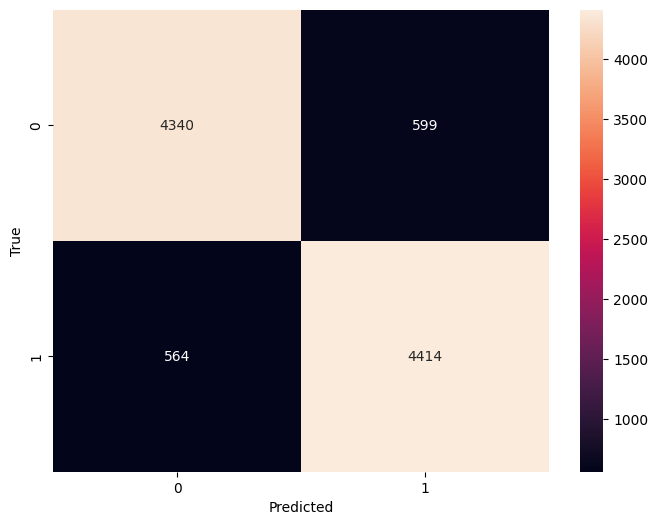

310/310 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4939
           1       0.88      0.86      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



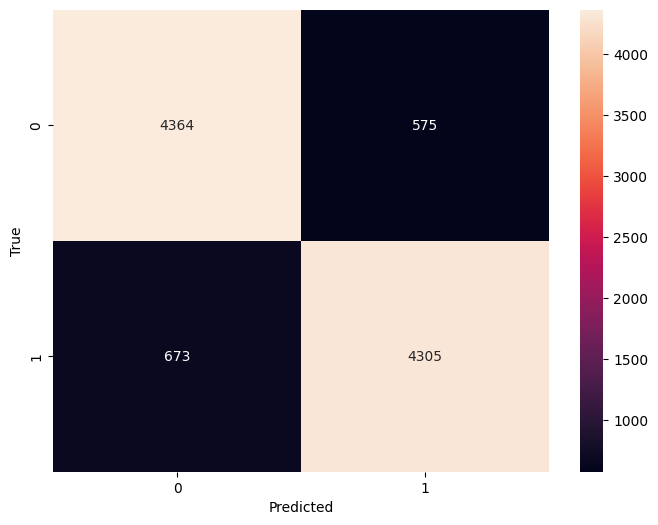

In [8]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)
    y_true = y_test.argmax(axis=1)
    
    print(classification_report(y_true, y_pred_classes))
    
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate both models
evaluate_model(model_1, X_test, y_test)
evaluate_model(model_2, X_test, y_test)
